# 1. Introduction
## Problem
We are interest in know the sales price of residential homes in Ames, Iowa giving the homes attributes.

And with that we could know which neighborhood has more offers for a price range of 100,000 to 250,000.

# 2. Data acquisition
## Data source
For this project we need the following data that we could get from kaggle in this [link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data), which contains all base data that we need.

## Data structure
Here's a brief version of the data description files.
* `SalePrice` - the property's sale price in dollars. This is the target variable that you're trying to predict.
* `MSSubClass` - The building class
* `MSZoning` - The general zoning classification
* `LotArea` - Lot size in square feet
* `LotShape` - General shape of property
* `LandContour` - Flatness of the property
* `Utilities` - Type of utilities available
* `LotConfig` - Lot configuration
* `LandSlope` - Slope of property
* `Neighborhood` - Physical locations within Ames city limits
* `Condition1` - Proximity to main road or railroad
* `Condition2` - Proximity to main road or railroad (if a second is present)
* `BldgType` - Type of dwelling
* `HouseStyle` - Style of dwelling
* `OverallQual` - Overall material and finish quality
* `OverallCond` - Overall condition rating
* `YearBuilt` - Original construction date
* `YearRemodAdd` - Remodel date
* `RoofStyle` - Type of roof
* `RoofMatl` - Roof material
* `Exterior1st` - Exterior covering on house
* `Exterior2nd` - Exterior covering on house (if more than one material)
* `MasVnrType` - Masonry veneer type
* `MasVnrArea` - Masonry veneer area in square feet
* `ExterQual` - Exterior material quality
* `ExterCond` - Present condition of the material on the exterior
* `Foundation` - Type of foundation
* `BsmtQual` - Height of the basement
* `BsmtCond` - General condition of the basement
* `BsmtExposure` - Walkout or garden level basement walls
* `BsmtFinType1` - Quality of basement finished area
* `BsmtFinSF1` - Type 1 finished square feet
* `BsmtFinType2` - Quality of second finished area (if present)
* `BsmtFinSF2` - Type 2 finished square feet
* `BsmtUnfSF` - Unfinished square feet of basement area
* `TotalBsmtSF` - Total square feet of basement area
* `Heating` - Type of heating
* `HeatingQC` - Heating quality and condition
* `CentralAir` - Central air conditioning
* `Electrical` - Electrical system
* `1stFlrSF` - First Floor square feet
* `2ndFlrSF` - Second floor square feet
* `LowQualFinSF` - Low quality finished square feet (all floors)
* `GrLivArea` - Above grade (ground) living area square feet
* `BsmtFullBath` - Basement full bathrooms
* `BsmtHalfBath` - Basement half bathrooms
* `FullBath` - Full bathrooms above grade
* `HalfBath` - Half baths above grade
* `Bedroom` - Number of bedrooms above basement level
* `Kitchen` - Number of kitchens
* `KitchenQual` - Kitchen quality
* `TotRmsAbvGrd` - Total rooms above grade (does not include bathrooms)
* `Functional` - Home functionality rating
* `Fireplaces` - Number of fireplaces
* `FireplaceQu` - Fireplace quality
* `GarageType` - Garage location
* `GarageYrBlt` - Year garage was built
* `GarageFinish` - Interior finish of the garage
* `GarageCars` - Size of garage in car capacity
* `GarageArea` - Size of garage in square feet
* `GarageQual` - Garage quality
* `GarageCond` - Garage condition
* `PavedDrive` - Paved driveway
* `WoodDeckSF` - Wood deck area in square feet
* `OpenPorchSF` - Open porch area in square feet
* `EnclosedPorch` - Enclosed porch area in square feet
* `3SsnPorch` - Three season porch area in square feet
* `ScreenPorch` - Screen porch area in square feet
* `PoolArea` - Pool area in square feet
* `MiscFeature` - Miscellaneous feature not covered in other categories
* `MiscVal` - $Value of miscellaneous feature
* `MoSold` - Month Sold
* `YrSold` - Year Sold
* `SaleType` - Type of sale
* `SaleCondition` - Condition of sale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
test_df_path = "test.csv"
test_df = pd.read_csv(test_df_path)
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
train_df_path = "train.csv"
train_df = pd.read_csv(train_df_path)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Methodology

Building a heatmap to see where the missing values are focus, in the train data frame

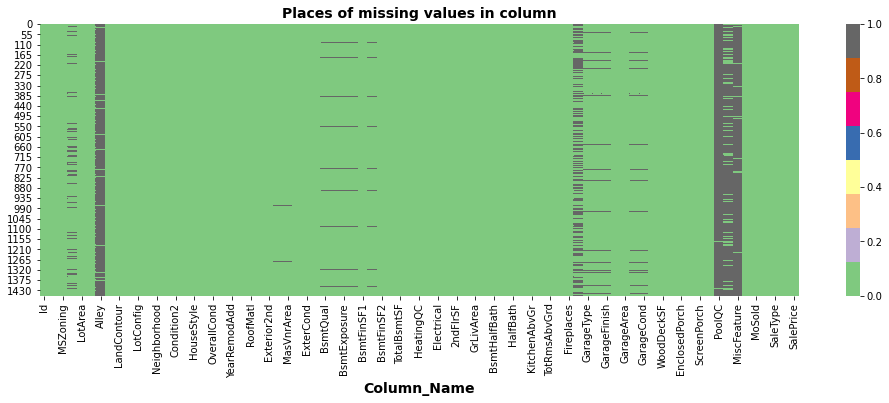

In [4]:
#Plotting heatmap of missing values
plt.figure(figsize=(17, 5))
sns.heatmap(train_df.isnull(), cmap='Accent')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

Building a heatmap to see where the missing values are focus, in the test data frame

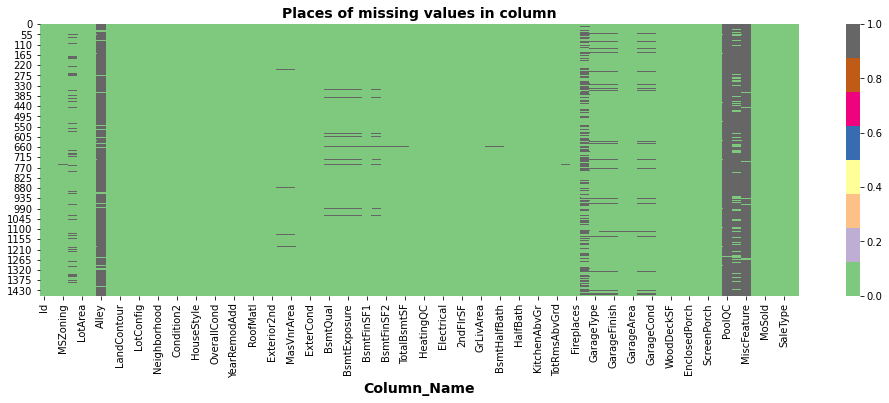

In [5]:
#Plotting heatmap of missing values
plt.figure(figsize=(17, 5))
sns.heatmap(test_df.isnull(), cmap='Accent')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

Changing missing data to 0

In [6]:
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

In [7]:
#Lets plot histogram for prices
# train_df["SalePrice"].hist()

Since the values of price after 400,000 look so small, making an other histogram to see that espectrum to

In [8]:
# train_df["SalePrice"][train_df["SalePrice"]>400000].hist()

Remove of unneeded columns

In [9]:
# Cloumns to remove
drop_colum = ['Id', 'PoolQC', 'Fence','MSZoning','MiscFeature','Alley', 'RoofStyle'
    ,'Condition2','HouseStyle','RoofMatl','Exterior1st','KitchenQual','Functional'
    ,'GarageQual','MiscFeature','SaleType','Electrical','Exterior2nd','Heating'
    ,'Utilities']
test_df = test_df.drop(columns=drop_colum, axis=1)
train_df = train_df.drop(columns=drop_colum, axis=1)

Removing random row since test set is missing one row

In [10]:
remove_n = 1
drop_indices = np.random.choice(train_df.index, remove_n, replace=False)
train_df = train_df.drop(drop_indices)
y_train_df = train_df[['SalePrice']]
train_df = train_df.drop('SalePrice', axis='columns')

Finding all columns with Categorical

In [11]:
cat_train=[cat for cat in train_df.columns if train_df[cat].dtype=='object']
cat_test=[cat for cat in test_df.columns if test_df[cat].dtype=='object']

Handling Categorical Data using Get_Dummies()

In [13]:
train_cat_dumm= pd.get_dummies(train_df, columns=cat_train, drop_first= True)
test_cat_dumm= pd.get_dummies(test_df, columns=cat_test, drop_first= True)

Concatenating the Original Dataset & the One after creating Dummies(get_dummies() creates a new DF containing JUST the dummies

In [14]:
train_df_clean=pd.concat([train_df,train_cat_dumm],axis=1)
test_df_clean=pd.concat([test_df,test_cat_dumm],axis=1)

Dropping the columns already concatenated after Get_Dummies()

In [15]:
train_df_clean=train_df_clean.drop(cat_train,axis=1)
test_df_clean=test_df_clean.drop(cat_test,axis=1)

Splitting data frames in independent x and dependent y

In [17]:
x_train_df=train_df_clean

x_test_df=test_df_clean

Splitting the data frane into test and training data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_train_df, y_train_df, test_size=0.25)
# y_train

Building a regression model

In [19]:
reg=GradientBoostingRegressor(random_state=0)
reg.fit(X_train,y_train)

D:\Users\Dante\anaconda3\envs\pythonProject\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(random_state=0)

Checking the variance score of the model

In [20]:
print('Variance score: %.2f' % reg.score(X_test, y_test))

Variance score: 0.87


Fit the complete train dateset in the model to get the prediction for the test dataset

In [21]:
reg=GradientBoostingRegressor(random_state=0)
reg.fit(x_train_df,y_train_df)

D:\Users\Dante\anaconda3\envs\pythonProject\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(random_state=0)

Getting the prediction of the prices for the test dataframe

In [23]:
predictions= reg.predict(x_test_df)

Checking the variance score of the model with the test dataset

In [24]:
print('Variance score: %.2f' % reg.score(x_test_df, predictions))

Variance score: 1.00


Now that we have the prediction of the prices we can add them to the dataset

In [25]:
neighborhood_df = test_df.loc[:]
neighborhood_df['SalePrice'] = predictions
neighborhood_df.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,20,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,0,0,0,120,0,0,6,2010,Normal,124292.259731
1,20,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,36,0,0,0,0,12500,6,2010,Normal,157212.249602
2,60,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,34,0,0,0,0,0,3,2010,Normal,177159.431107
3,60,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,36,0,0,0,0,0,6,2010,Normal,182888.854813
4,120,43.0,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,82,0,0,144,0,0,1,2010,Normal,191495.621211


Filtering the dataset in the price range

In [26]:
range_price_df = neighborhood_df[(neighborhood_df['SalePrice']<=250000) & (neighborhood_df['SalePrice']>=100000) ]
range_price_df.shape

(1145, 62)

Making a dataframe with the count of each Neighborhood

In [27]:
neighborhood_homes_price = pd.DataFrame(data=range_price_df.groupby(['Neighborhood'])['Neighborhood'].count())

,Neighborhood
Neighborhood,
Blmngtn,11
Blueste,8
BrDale,9
BrkSide,42
ClearCr,15


In [28]:
neighborhood_homes_price['Offers'] = neighborhood_homes_price[['Neighborhood']]
neighborhood_homes_price = neighborhood_homes_price.drop(['Neighborhood'],axis=1)

Sorting the dataframe by the count of offers on the Neighborhood

In [29]:
neighborhood_homes_price.sort_values(ascending=False,by=['Offers']).head()

,Offers
Neighborhood,
NAmes,213
CollgCr,95
OldTown,95
Gilbert,79
Edwards,76


Display of a visual graphic for the previews dataframe

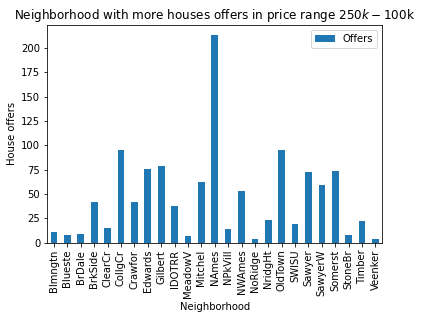

In [30]:
neighborhood_homes_price.plot(kind='bar')

plt.title("Neighborhood with more houses offers in price range $250k-$100k")
plt.xlabel("Neighborhood")
plt.ylabel("House offers")
plt.show()

**Code**  |  **Neighborhood Name**
--- | ---
Blmngtn  | 	Bloomington Heights
Blueste  | 	Bluestem
BrDale  | 	Briardale
BrkSide  | 	Brookside
ClearCr  | 	Clear Creek
CollgCr  | 	College Creek
Crawfor  | 	Crawford
Edwards  | 	Edwards
Gilbert  | 	Gilbert
IDOTRR  | 	Iowa DOT and Rail Road
MeadowV  | 	Meadow Village
Mitchel  | 	Mitchell
Names  | 	North Ames
NoRidge  | 	Northridge
NPkVill  | 	Northpark Villa
NridgHt  | 	Northridge Heights
NWAmes  | 	Northwest Ames
OldTown  | 	Old Town
SWISU  | 	South & West of Iowa State University
Sawyer  | 	Sawyer
SawyerW  | 	Sawyer West
Somerst  | 	Somerset
StoneBr  | 	Stone Brook
Timber  | 	Timberland
Veenker  | 	Veenker


# Results
As we can see on the result the best neighborhood to look for houses offers at price range 250k-100k is **North Ames**, since it has **214** offers.

# Conclusion
In this study, we manage to predict the prices of a set of house offerted and form there we were able to focus on a neighborhood that have more offers in our price range.
section where you conclude the report.


